<a href="https://colab.research.google.com/github/Torin99/CP321-FinalProject/blob/main/CP321_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [117]:
file_path = "Descriptors.TXT"

cars = pd.read_csv(file_path, delimiter='\t')
# Filter rows where 'VEHICLE_CLASS' is 'PASSENGER' i.e remove motorcycles, busses, etc
cars = cars[cars['VEHICLE_CLASS'] == 'PASSENGER']
cars = cars.drop(columns=['VEHICLE_CLASS','OUT-OF-PROV', 'SOLD', 'SUSPENDED', 'TEMPORARY'])

In [118]:
file_path = "MakeAndModel.TXT"

cars = pd.read_csv(file_path, delimiter='\t')
# Filter rows where 'VEHICLE_CLASS' is 'PASSENGER' i.e remove motorcycles, busses, etc
cars = cars[cars['VEHICLE_CLASS'] == 'PASSENGER']
cars = cars[cars['MAKE'] != '****']
cars = cars.drop(columns=['VEHICLE_CLASS','OUT-OF-PROV', 'SOLD', 'SUSPENDED', 'TEMPORARY'])

In [119]:
active_total = cars[cars['MODEL-YEAR'] >= 2015]

# Group by 'MAKE' and sum 'FIT-ACTIVE' and 'TOTAL' values
active_total = active_total.groupby('MAKE')[['FIT-ACTIVE', 'TOTAL']].sum()

# Sort the DataFrame by the summed 'FIT-ACTIVE' values
active_total['FIT-PERCENTAGE'] = (active_total['FIT-ACTIVE'] / active_total['TOTAL']) * 100
active_total = active_total[active_total['TOTAL'] > 50000]

active_total = active_total.sort_values(by='FIT-PERCENTAGE', ascending=False)

In [107]:
# Filter the data to include only manufacturing years from 2000 upwards
filtered_cars = cars[cars['MODEL-YEAR'] >= 2000]

# Group the filtered data by manufacturing year and calculate the wreck percentage for each year
wreck_percentage_by_year = (filtered_cars.groupby('MODEL-YEAR')['WRECKED'].sum() /
                            filtered_cars.groupby('MODEL-YEAR')['TOTAL'].sum()) * 100

# Create a DataFrame from the calculated wreck percentage
data = {'Manufacturing Year': wreck_percentage_by_year.index,
        'Wreck Percentage': wreck_percentage_by_year.values}
df = pd.DataFrame(data)

# Create the scatter plot using Plotly Express
fig = px.scatter(df, x='Manufacturing Year', y='Wreck Percentage',
                 title='Wreck Percentage vs. Manufacturing Year (2000 onwards)',
                 labels={'Manufacturing Year': 'Manufacturing Year', 'Wreck Percentage': 'Wreck Percentage'})

# Show the plot
fig.show()


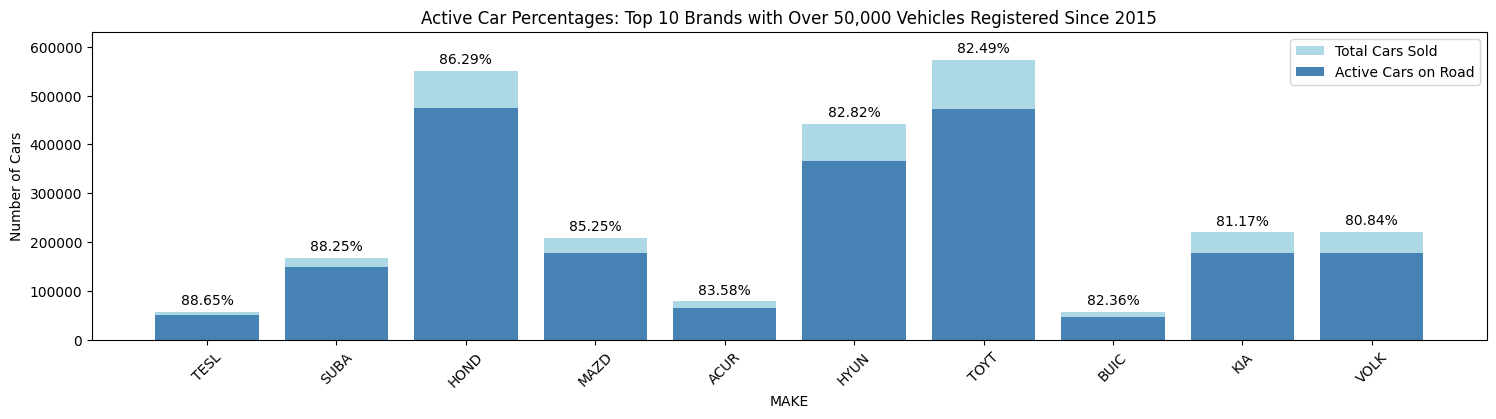

In [108]:
# Sort the DataFrame by the number of active cars and select only the top 10
active_total_sorted_top10 = active_total.nlargest(10, 'FIT-PERCENTAGE')

# Plotting the bar chart
fig, ax1 = plt.subplots(figsize=(18, 4))
bars = ax1.bar(active_total_sorted_top10.index, active_total_sorted_top10['TOTAL'], color='lightblue', label='Total Cars Sold')
ax1.bar(active_total_sorted_top10.index, active_total_sorted_top10['FIT-ACTIVE'], color='steelblue', label='Active Cars on Road')
ax1.set_xlabel('MAKE')
ax1.set_ylabel('Number of Cars')
ax1.set_title('Active Car Percentages: Top 10 Brands with Over 50,000 Vehicles Registered Since 2015')
ax1.tick_params(axis='x', rotation=45)

# Annotate each bar with the percentage value
for bar, percentage in zip(bars, active_total_sorted_top10['FIT-PERCENTAGE']):
    height = bar.get_height()
    ax1.annotate(f'{percentage:.2f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

# Set y-axis limits with extra space above the largest bar
largest_bar_height = max(active_total_sorted_top10['TOTAL'])
ax1.set_ylim(top=largest_bar_height * 1.1)  # Increase by 10% above the largest bar height

# Move legend to the top right corner
ax1.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0))

# Display the plot
plt.show()


In [109]:
makes_list = active_total_sorted_top10.index.tolist()
top_cars = cars[cars['MAKE'].isin(makes_list)]
top_cars = top_cars[top_cars['MODEL'] != '***']

In [116]:
import plotly.express as px

# Filter top_cars to include only 'FIT-Active' cars
fit_active_cars = top_cars[top_cars['FIT-ACTIVE'] > 0]

# Group the data by both 'MAKE' and 'MODEL' and sum the 'FIT-ACTIVE' values
grouped_cars = fit_active_cars.groupby(['MAKE', 'MODEL'])['FIT-ACTIVE'].sum().reset_index()

# Sort the data within each 'MAKE' group by 'FIT-ACTIVE' values in descending order
grouped_cars_sorted = grouped_cars.groupby('MAKE').apply(lambda x: x.nlargest(5, 'FIT-ACTIVE')).reset_index(drop=True)

# Create the treemap for total 'FIT-ACTIVE' Civics for each make
fig = px.treemap(grouped_cars_sorted,
                 path=['MAKE', 'MODEL'],
                 values='FIT-ACTIVE',
                 title='Top 5 Most Popular Active Car Models Across Manufacturers')
fig.show()
